In [128]:
import cv2 as cv
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage.measure import regionprops

import numpy as np
from matplotlib import pyplot as plt

In [262]:
#test image
image_ffn = '/home/meso/Desktop/cross-section-photos/analysis/photos/05.png'

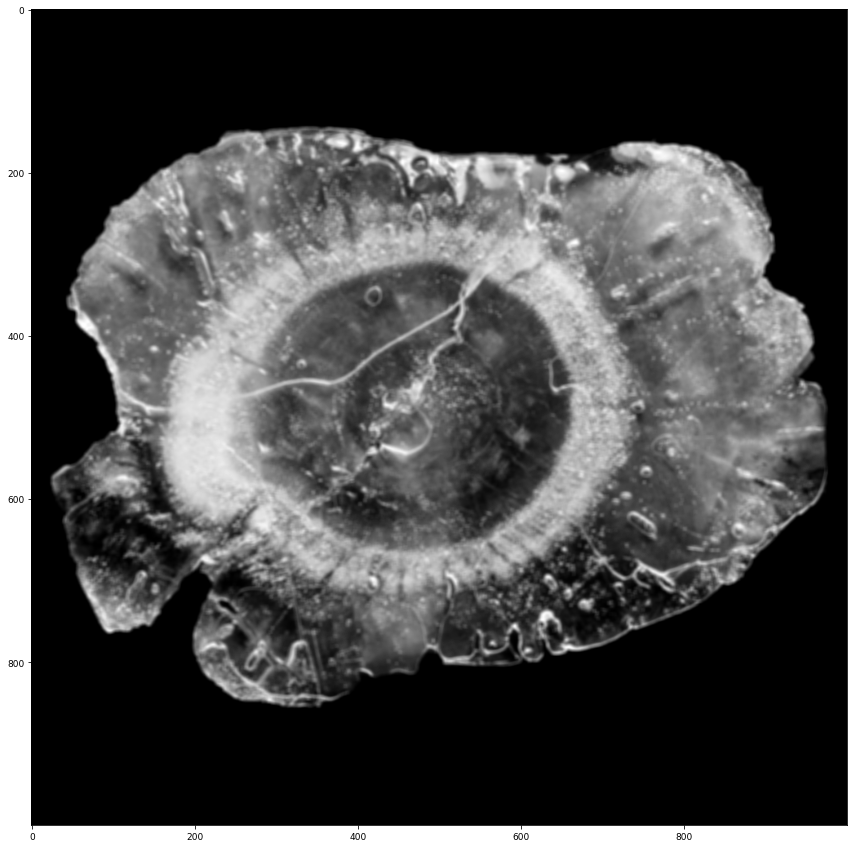

In [263]:
#transform into hsv colorspace
img_data = cv.imread(image_ffn)
img_data_hls = cv.cvtColor(img_data, cv.COLOR_BGR2HLS)
l_data = img_data_hls[:,:,1]/255
kernel = np.ones((5,5),np.float32)/25
l_data_smooth = cv.filter2D(l_data,-1,kernel)


fig = plt.figure(figsize=[15,15])
plt.imshow(l_data_smooth)

In [264]:
# from skimage.filters import try_all_threshold

# img_data = cv.imread(image_ffn)
# img_data_hls = cv.cvtColor(img_data, cv.COLOR_BGR2HLS)
# l_data = img_data_hls[:,:,1]/255
# kernel = np.ones((3,3),np.float32)/25
# l_data_smooth = cv.filter2D(l_data,-1,kernel)

# # Here, we specify a radius for local thresholding algorithms.
# # If it is not specified, only global algorithms are called.
# fig, ax = try_all_threshold(l_data_smooth.copy(), figsize=(10, 18), verbose=False)
# plt.show()

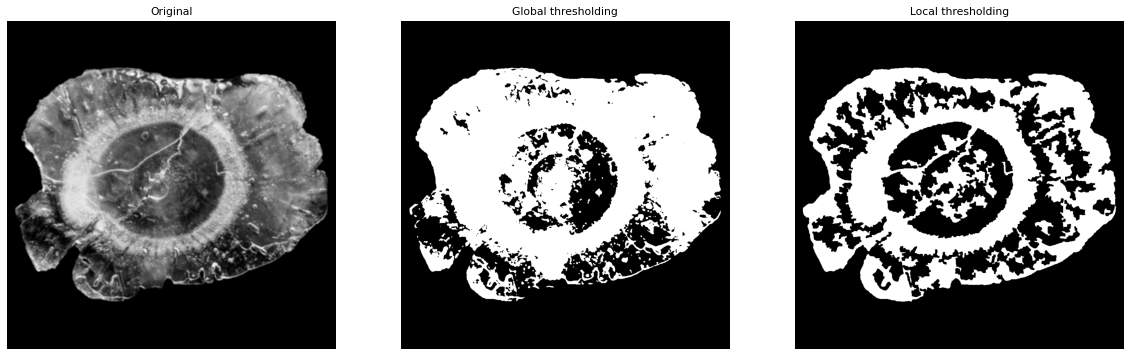

In [265]:
from skimage.filters import threshold_otsu, threshold_local

img_data = cv.imread(image_ffn)
img_data_hls = cv.cvtColor(img_data, cv.COLOR_BGR2HLS)
l_data = img_data_hls[:,:,1]/255
kernel = np.ones((5,5),np.float32)/25
img = cv.filter2D(l_data,-1,kernel)

global_thresh = threshold_otsu(img)
binary_global = img > global_thresh

block_size = 151
local_thresh = threshold_local(img, block_size, offset=0)
binary_local = img > local_thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 7))
ax = axes.ravel()
plt.gray()

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

mask = binary_local
kernel = np.ones((5,5),np.float32)/25
mask = skimage.morphology.binary_dilation(mask, selem=kernel)
mask = skimage.morphology.binary_erosion(mask, selem=kernel)

mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        mask, 1000),
    1000)

ax[2].imshow(mask)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

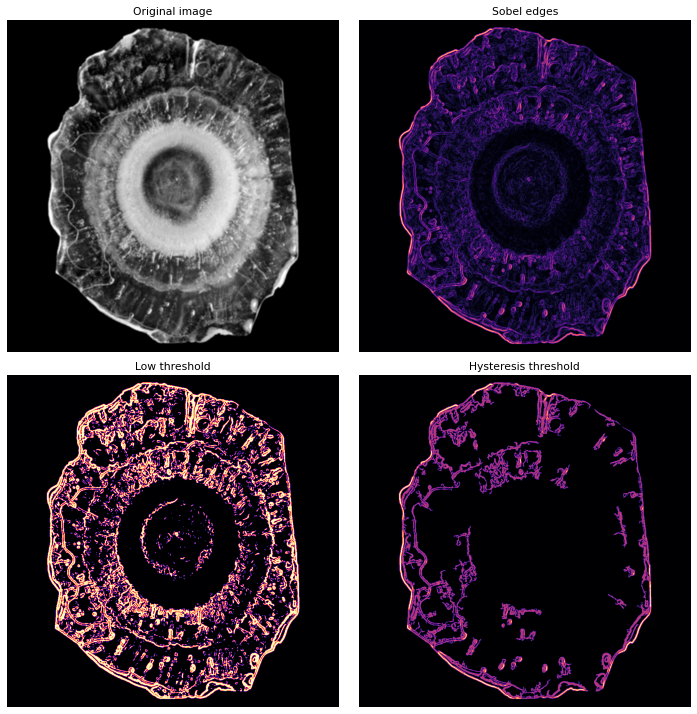

In [204]:
import matplotlib.pyplot as plt
from skimage import data, filters

fig, ax = plt.subplots(figsize=[10,10],nrows=2, ncols=2)

img_data = cv.imread(image_ffn)
img_data_hls = cv.cvtColor(img_data, cv.COLOR_BGR2HLS)
l_data = img_data_hls[:,:,1]/255
kernel = np.ones((5,5),np.float32)/25
image = cv.filter2D(l_data,-1,kernel)

edges = filters.sobel(image)

low = 0.05
high = 0.2

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

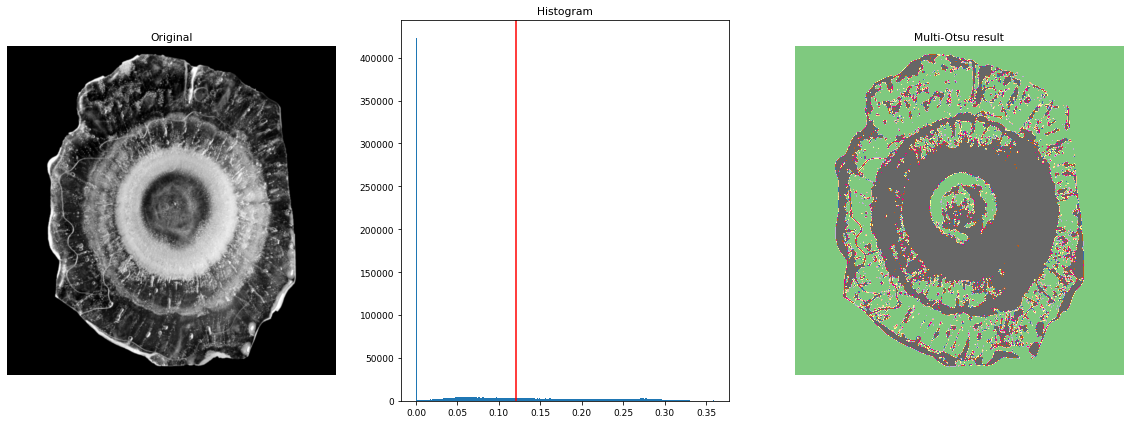

In [208]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

img_data = cv.imread(image_ffn)
img_data_hls = cv.cvtColor(img_data, cv.COLOR_BGR2HLS)
l_data = img_data_hls[:,:,1]/255
kernel = np.ones((3,3),np.float32)/25
image = cv.filter2D(l_data,-1,kernel)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=2)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

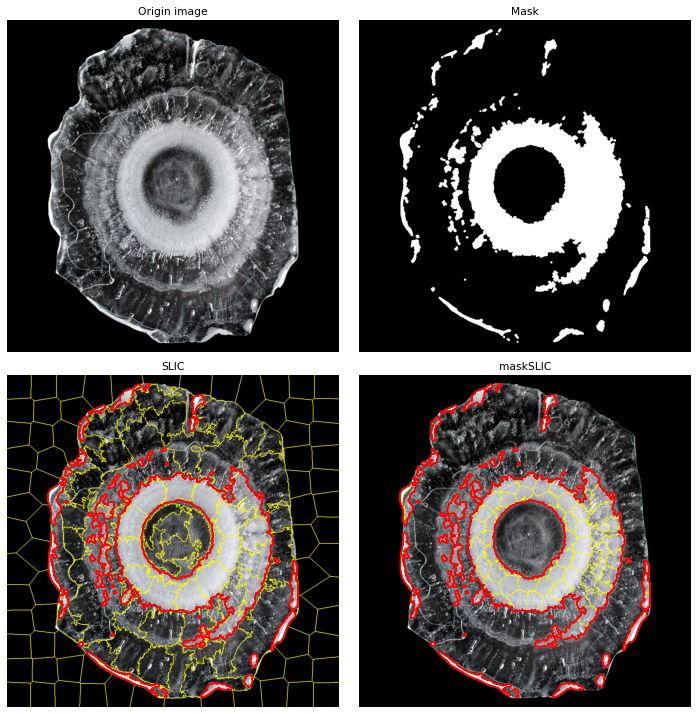

In [210]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

#transform into hsv colorspace
img_data = cv.imread(image_ffn)
img_data_hls = cv.cvtColor(img_data, cv.COLOR_BGR2HLS)
l_data = img_data_hls[:,:,1]/255
kernel = np.ones((5,5),np.float32)/25
l_data_smooth = cv.filter2D(l_data,-1,kernel)

# Input data
img = img_data

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum > 0.5, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title("Origin image")

ax2.imshow(mask, cmap="gray")
ax2.set_title("Mask")

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title("SLIC")

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title("maskSLIC")

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()
